In [1]:
%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

import os
from scipy.stats import ttest_ind

blue = sns.color_palette('Blues')[-3]
red =  sns.color_palette('Reds')[-3]
grey= sns.color_palette('Greys')[-3]

def jitterbox(**kwargs):
    'supply x, y, hue, data'
    sns.stripplot(**kwargs, dodge=True, alpha=0.5,zorder=0)
    ax = sns.boxplot(**kwargs, dodge=True, fliersize=0, zorder=10, boxprops = dict(facecolor=(0,0,0,0)))

    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1, 1), frameon=False)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_json('KaiB_feats.json.zip')
df['cluster_ind'] = [os.path.basename(x.replace('.pdb','')).split('_')[-1] for x in df['pdb']]

def get_type(pdb):
    end = pdb.split('_')[-1]
    if end=='REF.pdb':
        return 'REF'
    elif end.startswith('U'):
        return end.split('-')[0]
    else:
        return 'Tree'
    
df['Type'] = df.apply(lambda row: get_type(row['pdb']), axis=1)

In [3]:
def get_msaT(cluster_ind):
    return np.loadtxt('msaT_preds/msa_t__2QKEE_%s.npy' % cluster_ind)

tree_df = df.loc[df.Type=='Tree']
tree_df['msaT_arr'] = tree_df.apply(lambda row: get_msaT(row['cluster_ind']), axis=1)

/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_69540/4028131838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['msaT_arr'] = tree_df.apply(lambda row: get_msaT(row['cluster_ind']), axis=1)


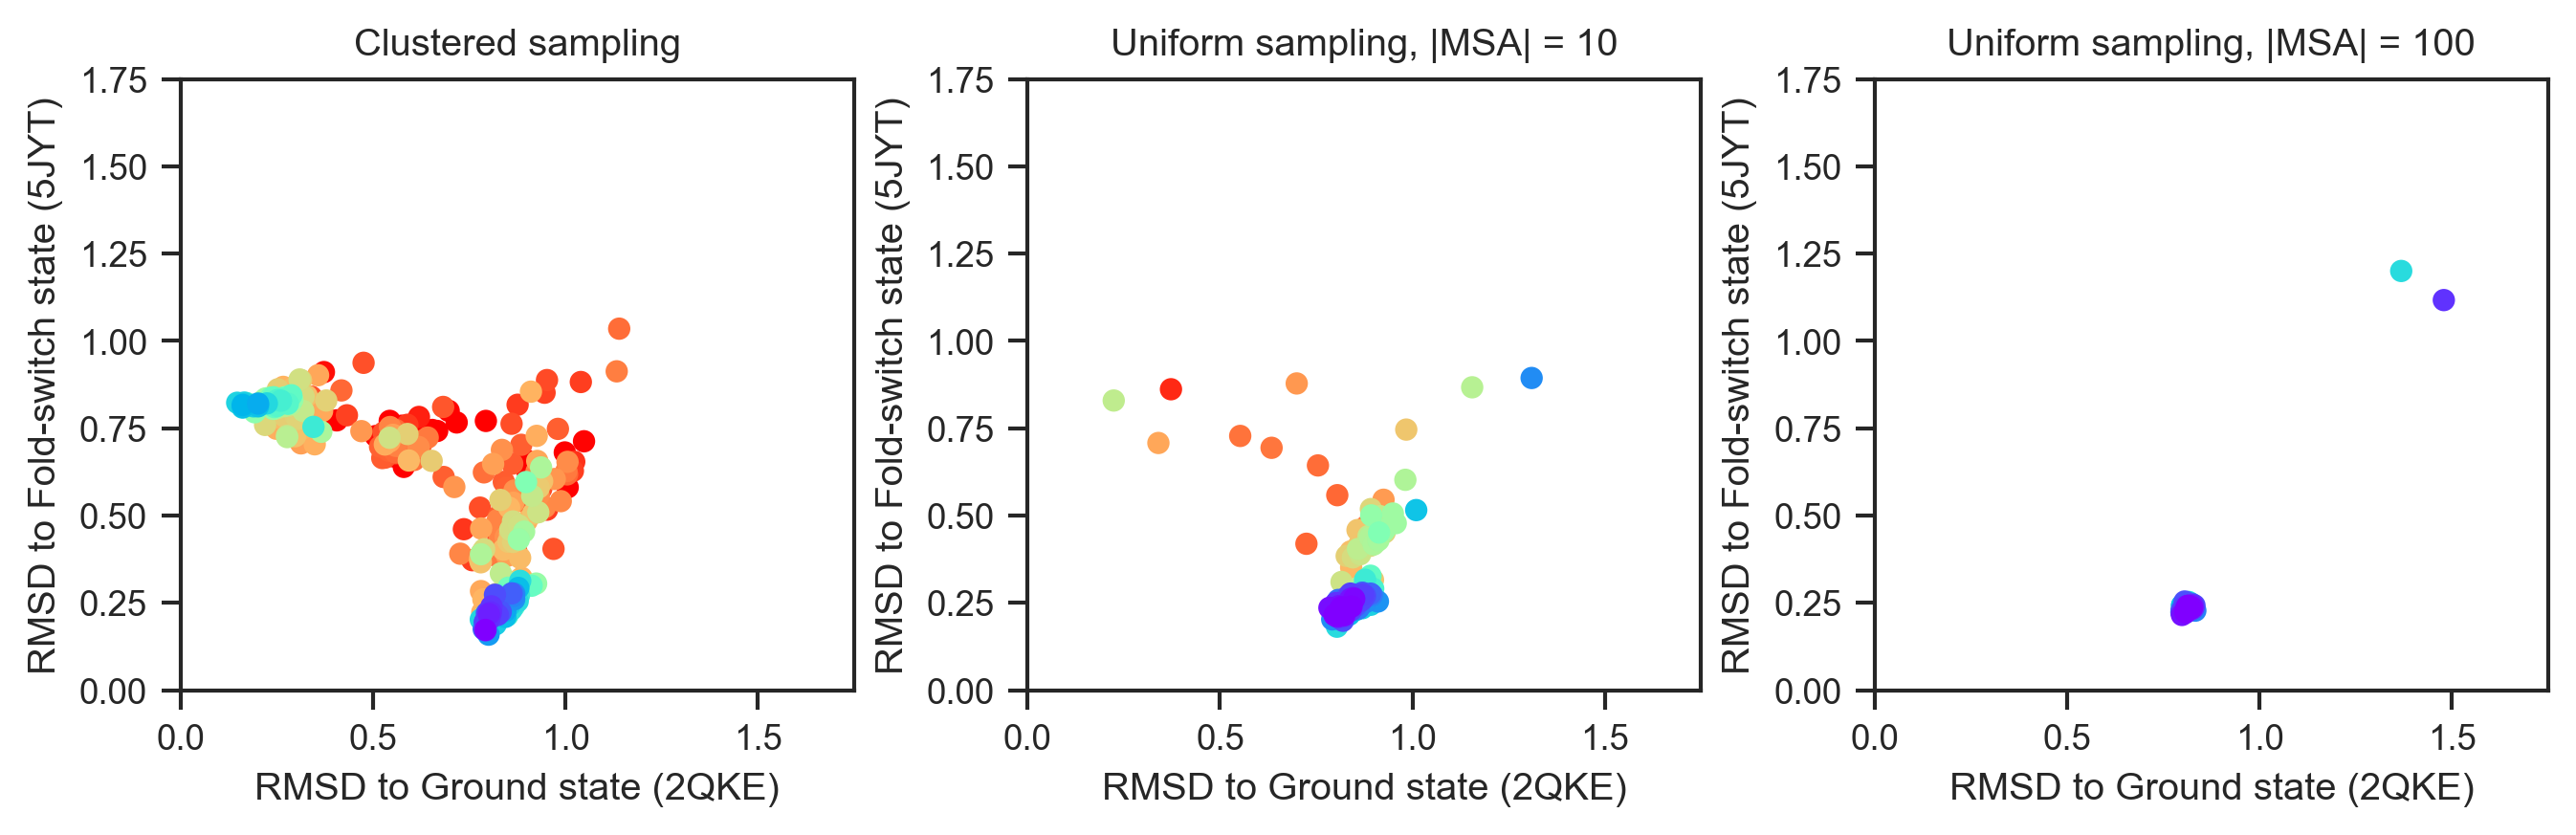

In [22]:
figure(figsize=(9,3))

df = df.sort_values('mean_pLDDT')
maxx=1.75
subplot(1,3,1)

tmp = df.loc[df.Type=='Tree']
scatter(tmp['rmsd_ref_2QKEE'], tmp['rmsd_ref_5JYTA'], c=tmp['mean_pLDDT'], cmap='rainbow_r',vmin=50,vmax=90)

#colorbar(aspect=3.5,label='MSA size',fraction=0.05,orientation='horizontal',ticks=[1e1,1e2,1e3])
xlabel('RMSD to Ground state (2QKE)')
ylabel('RMSD to Fold-switch state (5JYT)')

xlim([0,maxx])
ylim([0,maxx])
title('Clustered sampling')

subplot(1,3,2)

tmp = df.loc[df.Type=='U10']
scatter(tmp['rmsd_ref_2QKEE'], tmp['rmsd_ref_5JYTA'], c=tmp['mean_pLDDT'], cmap='rainbow_r',vmin=50,vmax=90)

title('Uniform sampling, |MSA| = 10')
#colorbar(aspect=3.5,label='MSA size',fraction=0.05,orientation='horizontal',ticks=[1e1,1e2,1e3])
xlabel('RMSD to Ground state (2QKE)')
ylabel('RMSD to Fold-switch state (5JYT)')

xlim([0,maxx])
ylim([0,maxx])
#

subplot(1,3,3)

tmp = df.loc[df.Type=='U100']
scatter(tmp['rmsd_ref_2QKEE'], tmp['rmsd_ref_5JYTA'], c=tmp['mean_pLDDT'], cmap='rainbow_r',vmin=50,vmax=90)
title('Uniform sampling, |MSA| = 100')

#colorbar(aspect=3.5,label='MSA size',fraction=0.05,orientation='horizontal',ticks=[1e1,1e2,1e3])
xlabel('RMSD to Ground state (2QKE)')
ylabel('RMSD to Fold-switch state (5JYT)')

xlim([0,maxx])
ylim([0,maxx])
tight_layout()

#savefig('kaib_landscape.pdf',bbox_inches='tight')

1041
67
Ttest_indResult(statistic=64.65818181937523, pvalue=0.0)
Ttest_indResult(statistic=10.94690475370725, pvalue=1.589057332827998e-23)


/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_69540/1528434649.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bkgd = df.loc[df['rmsd_ref_2QKEE']>=0.3][df['rmsd_ref_5JYTA']>=0.3]
/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_69540/1528434649.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_1['state'] = 'FS state'
/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_69540/1528434649.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

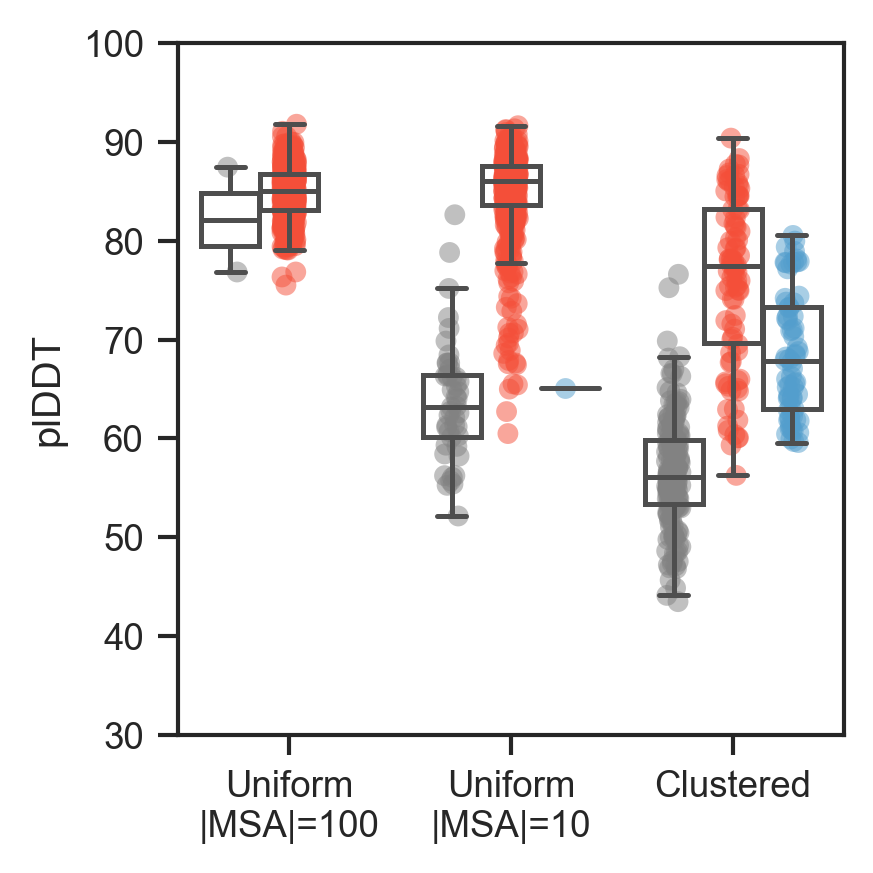

In [23]:
 # get representative clusters of first and second state
state_1 = df.loc[df['rmsd_ref_5JYTA']<0.3] #[df['mean_pLDDT']>87.5]
print(len(state_1))

state_2 = df.loc[df['rmsd_ref_2QKEE']<0.3] #[df['mean_pLDDT']>87.5]
print(len(state_2))

bkgd = df.loc[df['rmsd_ref_2QKEE']>=0.3][df['rmsd_ref_5JYTA']>=0.3]
state_1['state'] = 'FS state'
state_2['state'] = 'Ground state'
bkgd['state'] = 'Other'

df_w_states = pd.concat([state_1, state_2, bkgd])

figure(figsize=(3,3))

jitterbox(x='Type', y='mean_pLDDT', hue='state', data=df_w_states, 
              order=['U100','U10','Tree'],
              hue_order=['Other', 'FS state', 'Ground state'], palette=[grey, red, blue])
ylabel('plDDT')
ylim([30,100])
xticks(range(3), ['Uniform\n|MSA|=100', 'Uniform\n|MSA|=10', 'Clustered'])
xlabel('')
legend([],frameon=False)

tight_layout()

#savefig('kaib_state_plddts.pdf',bbox_inches='tight')

print(ttest_ind(state_1['mean_pLDDT'], bkgd['mean_pLDDT']))
print(ttest_ind(state_2['mean_pLDDT'], bkgd['mean_pLDDT']))

### Compare AF2 and MSA transformer predictions

In [6]:
import mdtraj as md

def get_contact_map(pdb_file, size=None, start_pos=0, end_pos=-1):
    
    pdb_obj = md.load_pdb(pdb_file)
    distances, pairs = md.compute_contacts(pdb_obj)
    contacts= md.geometry.squareform(distances, pairs)[0]
    if size is None:
        size = contacts.shape[0]
        
    arr=np.zeros([size, size])
    arr[np.where(contacts[start_pos:end_pos, start_pos:end_pos]<0.8)]=1

    return arr

contacts_2qke = get_contact_map('2qkeE.pdb')
contacts_5jyt = get_contact_map('5jytA.pdb')

In [7]:
def score_contact_map(arr, gt_arr):

    return np.sum(np.multiply(arr, gt_arr))/np.sum(gt_arr)

tree_df['contact_map_msaT_2qke_score'] = tree_df.apply(lambda row: score_contact_map(row['msaT_arr'], contacts_2qke), axis=1)
tree_df['contact_map_msaT_5jyt_score'] = tree_df.apply(lambda row: score_contact_map(row['msaT_arr'], contacts_5jyt), axis=1)
tree_df['score_ratio'] = tree_df.apply(lambda row: row['contact_map_msaT_5jyt_score']/row['contact_map_msaT_2qke_score'], axis=1)



/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_69540/3934809889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['contact_map_msaT_2qke_score'] = tree_df.apply(lambda row: score_contact_map(row['msaT_arr'], contacts_2qke), axis=1)
/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_69540/3934809889.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['contact_map_msaT_5jyt_score'] = tree_df.apply(lambda row: score_contact_map(row['msaT_arr'], contacts_5jyt), axis=1)
/var

In [8]:
 # get representative clusters of first and second state
state_1 = tree_df.loc[tree_df['rmsd_ref_5JYTA']<0.3]
print(len(state_1))

state_2 = tree_df.loc[tree_df['rmsd_ref_2QKEE']<0.3]
print(len(state_2))

bkgd = tree_df.loc[tree_df['rmsd_ref_2QKEE']>=0.3][df['rmsd_ref_5JYTA']>=0.3]

state_1['state'] = 'FS state'
state_2['state'] = 'Ground state'
bkgd['state'] = 'Other'

tree_df = pd.concat([state_1, state_2, bkgd])


90
66


/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_69540/1575777482.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bkgd = tree_df.loc[tree_df['rmsd_ref_2QKEE']>=0.3][df['rmsd_ref_5JYTA']>=0.3]
/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_69540/1575777482.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_1['state'] = 'FS state'
/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_69540/1575777482.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Ttest_indResult(statistic=-7.289356282624439, pvalue=3.7090558969342615e-12)
Ttest_indResult(statistic=6.014174863202854, pvalue=6.796276530752157e-09)


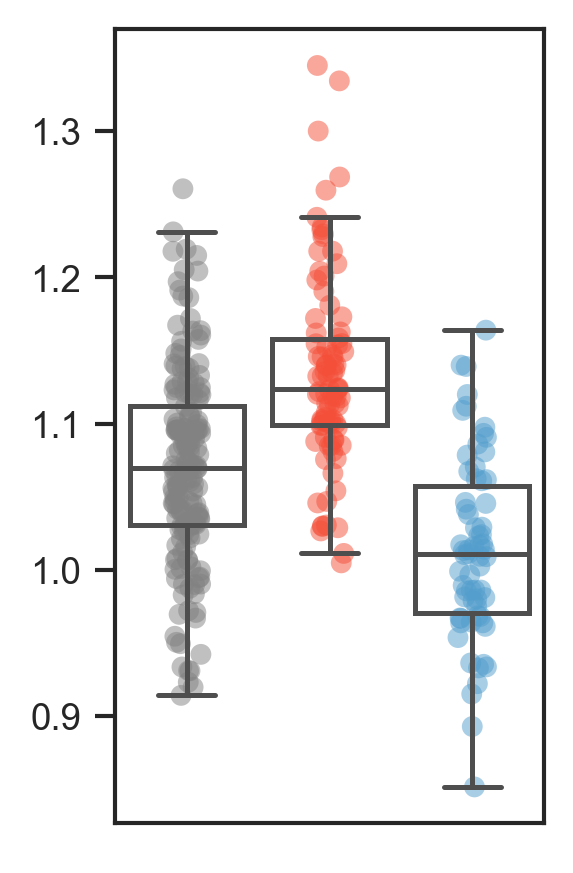

In [17]:
figure(figsize=(2,3))
ylabel('Ratio to FS or ground state of MSA Transformer contact map')
jitterbox(x='state', y='score_ratio', data=tree_df,order=['Other', 'FS state', 'Ground state'], palette=[grey, red, blue])
#title('MSA Transformer prediction for clusters\n<-ground state                    FS state->')
ylabel('')
xticks([])
xlabel('')
print(ttest_ind(tree_df.loc[tree_df.state=='Other']['score_ratio'], tree_df.loc[tree_df.state=='FS state']['score_ratio']))
print(ttest_ind(tree_df.loc[tree_df.state=='Other']['score_ratio'], tree_df.loc[tree_df.state=='Ground state']['score_ratio']))
tight_layout()
#savefig('MSA_transformer_score.pdf',bbox_inches='tight')

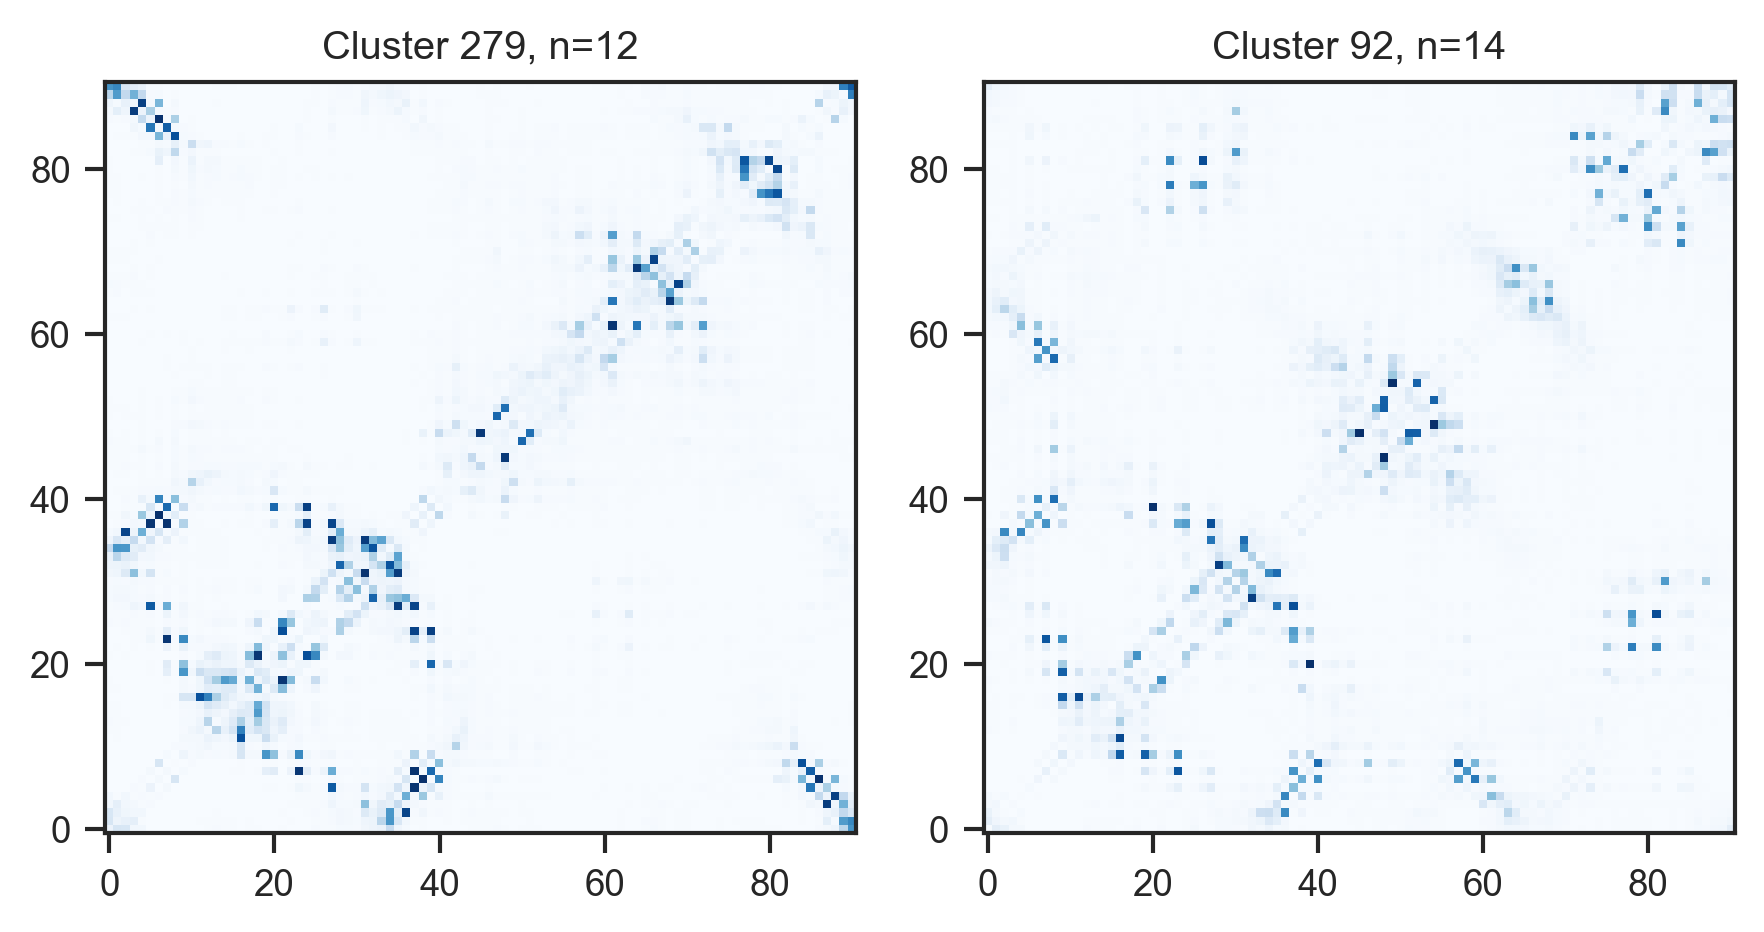

In [19]:
figure(figsize=(6,3))
subplot(1,2,1)
row=tree_df.sort_values('score_ratio').iloc[0]
title('Cluster 279, n=12')
imshow(row['msaT_arr'],origin='lower', cmap='Blues')

subplot(1,2,2)
row=tree_df.sort_values('score_ratio').iloc[-1]
imshow(row['msaT_arr'],origin='lower', cmap='Blues')
title('Cluster 92, n=14')
tight_layout()

#savefig('example_msa_transformer_plots.pdf',bbox_inches='tight')

In [25]:
# To get top n models by plDDT, Ground state
n=5

print('Ground state')
for _, row in df.loc[df.Type=='Tree'][df['rmsd_ref_2QKEE']<0.3].sort_values('mean_pLDDT', ascending=False)[:n].iterrows():
    print(row['pdb'])

print('FS state')
for _, row in df.loc[df.Type=='Tree'][df['rmsd_ref_5JYTA']<0.3].sort_values('mean_pLDDT', ascending=False)[:5].iterrows():
    print(row['pdb'])

Ground state
preds_3r/2QKEE_172.pdb
preds_3r/2QKEE_51.pdb
preds_3r/2QKEE_29.pdb
preds_3r/2QKEE_30.pdb
preds_3r/2QKEE_32.pdb
FS state
preds_3r/2QKEE_150.pdb
preds_3r/2QKEE_16.pdb
preds_3r/2QKEE_271.pdb
preds_3r/2QKEE_33.pdb
preds_3r/2QKEE_01.pdb


/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_69540/365106609.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for _, row in df.loc[df.Type=='Tree'][df['rmsd_ref_2QKEE']<0.3].sort_values('mean_pLDDT', ascending=False)[:n].iterrows():
/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_69540/365106609.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for _, row in df.loc[df.Type=='Tree'][df['rmsd_ref_5JYTA']<0.3].sort_values('mean_pLDDT', ascending=False)[:5].iterrows():
